# Project Description and Goals

Across the United States, there are police altercations that result in deadly outcomes. A great deal of data on the fatal occurrences has been recorded and includes information on fatalities caused by police, whether they were on-duty, off-duty, criminal, line-of-duty, local, federal, intentional, or accidental. For our capstone, we address the issue of police violence that has become a heated topic throughout the country. As a team, we attempt to help law enforcement agencies identify risk factors so they may step in before risk transforms into actual harm. 


Our project aims to research what attributes surround fatal police-related encounters and to analyze the attributes about these incidents that may be leading to the fatalities. Two open-sourced datasets we acquired:
- [Mapping Police Violence](https://mappingpoliceviolence.org/aboutthedata) for our first iteration has gathered over 9000 police killings from January 2013 to May 2021. 
    - For the first iteration, we’re taking one of these attributes (the threat level of the victim) and building a model around it to predict if the victim is classified as being an attacker or a non-attacker based on the other top attributes in the MPV dataset. 
    

- [Fatal Encounters](https://fatalencounters.org/) for our second iteration has information on over 30,000 records from January 2000 to May 2021.
    - For the second iteration, we're doing the same (building a model around the threat level of the victim), but predicting if the victim is classified as threatening, non-threatening, or ambiguous based on the other top attributes in the FE dataset. 

Our hope is to shed light on changes to be made within law enforcement, help identify what response teams should be more available, and to improve the way emergency teams are responding to altercations across the United States. Is there a way to modify law enforcement trainings and policies to decrease officer-involved incidents. Are we able to improve the safety and outcomes for all people involved, both officers and civilians? The overall goal is to save lives, provide insights, and find recommendations that will be of assistance. 

### Objectives for this project include:
- Identifying the drivers of civilian fatalities. 
- Documenting the process and analysis throughout the data science pipeline.
- Constructing a classification model that can predict what the victim's threat level is, given the features of the dataset.
- Deliverables:
    - README.md file containing overall project information. 
    - A well-documented Jupyter notebook detailing the data science pipeline process.
    - Python modules that automate the data acquisition, preparation, and exploration process.

### Initial Thoughts and Hypotheses:
- Armed/unarmed victims?
- Fleeing/not fleeing victims? 
- Did the victim put others in danger?
- Is there a mental illness that contributed to the incident? 
- Is race, gender, age or location influencing alleged threat level?
- How does mental illness affect each gender?
- Are officers wearing their body cameras and does it make a difference in alleged threat level?
- Is there even enough information being documented on the police reports? 
- Is cause of death and alleged threat level independent of one another?
- What are the fatalities by state: % killings vs pop

___
# Imports 
Import all necessary libraries and functions. 

In [1]:
import pandas as pd
import numpy as np

# Helper Functions
import wrangle as w 
import explore as exp
from explore import rfe, split, select_kbest

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Hypothesis tests
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

# Split data
from sklearn.model_selection import train_test_split

#Feature Engineering
from sklearn.feature_selection import SelectKBest, f_regression, chi2
from sklearn.feature_selection import RFE

# Evaluate models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Create models for classification ML:
# Decision Tree  
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# K-Nearest Neighbor(KNN)  
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Evaluate models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support 


___
# Acquire Data

In [2]:
# reads data from MPV website's downloaded dataset
df = pd.read_excel('new_data.xlsx')
df.head()

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.


### Initial Data Summarization

In [ ]:
# rows and columns
df.shape

(30244, 48)

In [ ]:
# list of column names and data types with information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30244 entries, 0 to 30243
Data columns (total 48 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Unique ID                                                        30243 non-null  float64       
 1   Name                                                             30244 non-null  object        
 2   Age                                                              29121 non-null  object        
 3   Gender                                                           30118 non-null  object        
 4   Race                                                             30242 non-null  object        
 5   Race with imputations                                            29718 non-null  object        
 6   Imputation probability                                           29701 non-nul

In [ ]:
# check nulls
df.isnull().sum()

Unique ID                                                              1
Name                                                                   0
Age                                                                 1123
Gender                                                               126
Race                                                                   2
Race with imputations                                                526
Imputation probability                                               543
URL of image (PLS NO HOTLINKS)                                     16251
Date of injury resulting in death (month/day/year)                     0
Location of injury (address)                                         545
Location of death (city)                                              39
State                                                                  1
Location of death (zip code)                                         184
Location of death (county)                         

In [ ]:
# specify useless columns and what to exclude for counts
useless_columns = df.columns[32:]
exclusions = ['url_of_image_pls_no_hotlinks', 'uid_temporary', 'name_temporary', 'description_temp', 'url_temp', \
        'supporting_document_link', 'dispositions_exclusions_internal_use,_not_for_analysis', 'foreknowledge_of_mental_illness?_internal_use,_not_for_analysis', \
        'race_with_imputations', 'name', 'imputation_probability', 'location_of_injury_address', 'location_of_death_city', 'state', 'location_of_death_county', \
        'full_address', 'latitude', 'longitude']

# getting value counts for specific columns
for column in df.columns:
    if column not in exclusions and column not in useless_columns:
        print(column.upper())
        print(df[column].value_counts())
        print("-------------------------------------")

UNIQUE ID
17653.0    1
25282.0    1
6416.0     1
20496.0    1
22458.0    1
          ..
9841.0     1
23585.0    1
5000.0     1
28998.0    1
2150.0     1
Name: Unique ID, Length: 30243, dtype: int64
-------------------------------------
NAME
Name withheld by police     1269
John Doe 1                     5
John Doe 2                     5
Michael Johnson                5
William Smith                  4
                            ... 
Rene Carlos Guevara            1
Alonzo Arnold                  1
Ricarless Cortezz Wright       1
Kevin Ernest Tree              1
Randy Lee Goforth              1
Name: Name, Length: 28733, dtype: int64
-------------------------------------
AGE
22      912
25      895
24      862
21      848
27      848
       ... 
.33       1
77        1
76        1
0.24      1
0.25      1
Name: Age, Length: 195, dtype: int64
-------------------------------------
GENDER
Male           27200
Female          2898
Transgender       20
Name: Gender, dtype: int64
----------

In [ ]:

# univariate distributions
#for column in df.columns:
#    if column not in exclusions and column not in useless_columns:
#        sns.countplot(x=df[column], data=df, palette = 'ocean_r')
#        print("------------------------------------------------------")
#        print("------------------------------------------------------")
#        plt.xticks(rotation=65)
#        plt.show()


### Takeaways
- There are a couple of unnecessary columns (begin with `Unnamed:`).
- Messy column names need to be renamed for better readability.
- A lot of columns are not needed due to nulls/unusable and will need to be dropped. 
- Most values in each column have a wide variety of text variation. These should be lowercased, stripped, and grouped. 
- Many nulls in dataset that need to be filled in or dropped.
- Dummy variables and encoding needs to be done to pretty much all of the dataset in order to model/evaluate. 
- Possibly a good idea to create age bins.
- Possible exploration with time series. Set `Date of Incident` as datetime index?



___
# Prepare and Split Data

In [ ]:
#grab cleaned data frame from wrangle.py
df = w.wrangle_new_data(cached=True).drop(columns='Unnamed: 0')
df.head()

,unique_id,age,gender,race,date_of_injury_resulting_in_death_month_day_year,location_of_death_zip_code,agency_or_agencies_involved,highest_level_of_force,armed_unarmed,alleged_weapon,...,had_no_weapon,had_other_weapon,under 12,12-17,18-24,25-34,35-44,45-54,55-64,65+
0,14050.0,20.0,male,black,2007-02-07,68111.0,omaha police department,gunshot,armed,edged weapon,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12167.0,12.0,female,hispanic,2013-01-01,78375.0,texas department of public safety,medical emergency,unarmed,no_weapon,...,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12171.0,26.0,male,white,2013-01-01,56001.0,mankato department of public safety,tasered,unarmed,no_weapon,...,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,12172.0,21.0,male,white,2013-01-01,54838.0,douglas county sheriff's office,gunshot,armed,firearm,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(13265, 37)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.rename(columns={'aggressive_physical_movement' : 'alleged_threat_lvl'}, inplace=True)

In [ ]:
#double check no nulls
df.isnull().sum()

unique_id                                           0
age                                                 0
gender                                              0
race                                                0
date_of_injury_resulting_in_death_month_day_year    0
location_of_death_zip_code                          0
agency_or_agencies_involved                         0
highest_level_of_force                              0
armed_unarmed                                       0
alleged_weapon                                      0
alleged_threat_lvl                                  0
fleeing_not_fleeing                                 0
brief_description                                   0
intended_use_of_force_developing                    0
fleeing                                             0
age_bins                                            0
is_asian_pacific islander                           0
is_black                                            0
is_hispanic                 

In [ ]:
#double check data types
df.dtypes

unique_id                                           float64
age                                                 float64
gender                                               object
race                                                 object
date_of_injury_resulting_in_death_month_day_year     object
location_of_death_zip_code                          float64
agency_or_agencies_involved                          object
highest_level_of_force                               object
armed_unarmed                                        object
alleged_weapon                                       object
alleged_threat_lvl                                   object
fleeing_not_fleeing                                  object
brief_description                                    object
intended_use_of_force_developing                     object
fleeing                                             float64
age_bins                                             object
is_asian_pacific islander               

In [ ]:
#split the data using the split function in explore.py
train, validate, test = split(df, stratify_by="alleged_threat_lvl")

#check split datasets
print('overall shape of dataframe:', df.shape)
print('train:', train.shape)
print('validate:', validate.shape)
print('test:', test.shape)

#work w/ training data
train.head()

overall shape of dataframe: (13137, 37)
train: (7356, 37)
validate: (3153, 37)
test: (2628, 37)


,unique_id,age,gender,race,date_of_injury_resulting_in_death_month_day_year,location_of_death_zip_code,agency_or_agencies_involved,highest_level_of_force,armed_unarmed,alleged_weapon,...,had_no_weapon,had_other_weapon,under 12,12-17,18-24,25-34,35-44,45-54,55-64,65+
12025,27652.0,48.0,male,unknown_race,2020-03-03,33187.0,miami-dade police department,gunshot,armed,edged weapon,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5781,17870.0,35.0,male,black,2016-07-02 00:00:00,28806.0,asheville police department,gunshot,armed,firearm,...,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10778,26220.0,61.0,male,white,2019-06-24,34224.0,charlotte county sheriff's office,gunshot,armed,firearm,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
58,12221.0,17.0,male,black,2013-01-11,1569.0,uxbridge police department,vehicle,unarmed,no_weapon,...,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1127,13305.0,29.0,male,white,2013-08-23,85032.0,mesa police department,gunshot,armed,firearm,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Takeaway
- Data is prepped/split and ready to be explored, modeled, and evaluated.


___
# Explore Data
#### Address questions posed in planning
- Does gender make a difference in alleged threat level?
- How does mental illness affect each gender?
- Do symptoms of mental illness play a role in threat level?
- Is race a factor for alleged threat level?
- Does bodycam make a difference in alleged threat level?
- Is cause of death and alleged threat level independent of one another?
- What areas in geography are resulting in more killings?
- What are the fatalities by state: % killings vs pop

## • Visualizations

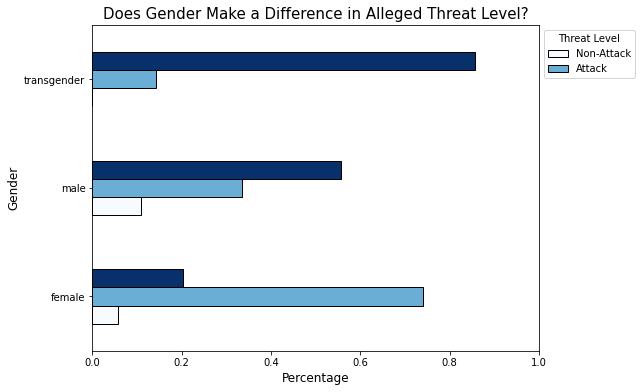

alleged_threat_lvl,ambiguous_threat,no_threat,threat
gender,,,
female,0.057103,0.739554,0.203343
male,0.108732,0.334188,0.557080
transgender,0.000000,0.142857,0.857143


In [ ]:
#visualize gender vs alleged threat level
ax = pd.crosstab(train.gender, train.alleged_threat_lvl, normalize ='index').plot.barh(figsize=(8, 6), cmap=plt.cm.get_cmap('Blues'), ec="black")

#customize legend
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Non-Attack', 'Attack'], 
          bbox_to_anchor=(1,1), 
          title='Threat Level')

#customize chart
plt.title("Does Gender Make a Difference in Alleged Threat Level?", fontsize = 15)
plt.ylabel("Gender", fontsize = 12)
plt.xlabel('Percentage', fontsize = 12)
ax.tick_params(labelsize=10)
plt.xlim([0.0, 1.0])
plt.show()

#get percentages df
percentages = pd.crosstab(train.gender, train.alleged_threat_lvl, normalize = 'index')
percentages

### Takeaways
- Highest percentage of non-attacks are transgender. Second highest is female.
- Highest percentage of attacks are male. Second highest is female.
- Males are almost equally likely to be an attack or non-attack threat level.

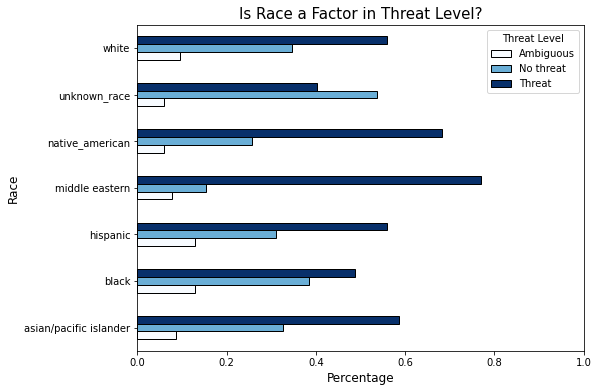

alleged_threat_lvl,ambiguous_threat,no_threat,threat
race,,,
asian/pacific islander,0.087302,0.325397,0.587302
black,0.128396,0.383591,0.488013
hispanic,0.129812,0.310654,0.559534
middle eastern,0.076923,0.153846,0.769231
native_american,0.059406,0.257426,0.683168
unknown_race,0.059313,0.537981,0.402706
white,0.095223,0.346409,0.558368


In [ ]:
#visualize race vs alleged threat level
ax = pd.crosstab(train.race, train.alleged_threat_lvl, normalize ='index').plot.barh(figsize=(8, 6), cmap=plt.cm.get_cmap('Blues'), ec="black")

#customize legend
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Ambiguous', 'No threat', 'Threat'], 
          bbox_to_anchor=(1,1), 
          title='Threat Level')

#customize chart
plt.title("Is Race a Factor in Threat Level?", fontsize = 15)
plt.ylabel("Race", fontsize = 12)
plt.xlabel('Percentage', fontsize = 12)
ax.tick_params(labelsize=10)
plt.xlim([0.0, 1.0])
plt.show()

#get percentages df
percentages = pd.crosstab(train.race, train.alleged_threat_lvl, normalize = 'index')
percentages

### Takeaways
- The highest occurrence of non-attacks are seen in Native Americans. Second highest is Hispanics.
- The highest occurrence of attacks are seen in White races. Second highest appears to be Asians/Pacific Islanders. 
- Black races are almost equally likely to result in attack/non-attack threat levels.
- There is a lot of unknown races in the data. Why?


___

## • Hypothesis Testing

In [ ]:
threat_dummies = pd.get_dummies(df.alleged_threat_lvl, drop_first=False, prefix='is')

In [ ]:
df = pd.concat([df, threat_dummies], axis=1)

In [ ]:
train, validate, test = split(df, stratify_by="alleged_threat_lvl")

In [ ]:
#t-test for gender vs threat level
female = train[train.gender == 'female']
male = train[train.gender == 'male']
transg = train[train.gender == 'transgender']
not_male = train[train.gender != 'male']

male_att = male.is_threat
non_male_att = not_male.is_threat

null_hypothesis = "There is not a difference between male attackers and the remaining population."
alternative_hypothesis = "Attacker status for males & total population are different."
confidence_level = .95
a = 1 - confidence_level

t, p = stats.ttest_ind(male_att, non_male_att)
print(t, p)

if p < a:
    print("We reject the null hypothesis.")
    print(f"We can move forward with alternative hypothesis: {alternative_hypothesis}")
else:
    print("We fail to reject the null hypothesis")
    print(f"Not enough evidence to support the claim: {null_hypothesis}")

18.17457349129139 3.0751893776102073e-72
We reject the null hypothesis.
We can move forward with alternative hypothesis: Attacker status for males & total population are different.


In [ ]:
#chi2 test for race vs alleged threat level
exp.chi2_matts(train, 'race', 'alleged_threat_lvl', alpha=0.05)

Observed

[[  11   41   74]
 [ 241  720  916]
 [ 145  347  625]
 [   1    2   10]
 [   6   26   69]
 [  57  517  387]
 [ 301 1095 1765]]
---
Expected

[[1.30522023e+01 4.70701468e+01 6.58776509e+01]
 [1.94436378e+02 7.01195759e+02 9.81367863e+02]
 [1.15708809e+02 4.17280587e+02 5.84010604e+02]
 [1.34665579e+00 4.85644372e+00 6.79690049e+00]
 [1.04624796e+01 3.77308320e+01 5.28066884e+01]
 [9.95489396e+01 3.59003263e+02 5.02447798e+02]
 [3.27444535e+02 1.18086297e+03 1.65269250e+03]]
---

chi^2 = 184.2978
p     = 0.0000

Because the p-value: 0.0 is less than alpha: 0.05, we can reject the null hypothesis


# Split up race for further testing

### Takeaways
- All four statistical tests rejected the null hypothesis.
    - T-test demonstrates there is a difference between male attackers and the remaining population.
    - 1st Chi^2 test demonstrates that mental status is dependent on alleged threat level.
    - 2nd Chi^2 test demonstrates that race is dependent on alleged threat level.
    - 3rd Chi^2 test demonstrates that bodycam is dependent on alleged threat level.


___
# Modeling

In [ ]:
#set up X inputs and y target variable for each split
X_train = train.drop(columns=['alleged_threat_lvl'])
y_train = train.alleged_threat_lvl

X_validate = validate.drop(columns=['alleged_threat_lvl'])
y_validate = validate.alleged_threat_lvl

X_test = test.drop(columns=['alleged_threat_lvl'])
y_test = test.alleged_threat_lvl

In [ ]:
df.columns

Index(['unique_id', 'age', 'gender', 'race',
       'date_of_injury_resulting_in_death_month_day_year',
       'location_of_death_zip_code', 'agency_or_agencies_involved',
       'highest_level_of_force', 'armed_unarmed', 'alleged_weapon',
       'alleged_threat_lvl', 'fleeing_not_fleeing', 'brief_description',
       'intended_use_of_force_developing', 'fleeing', 'age_bins',
       'is_asian_pacific islander', 'is_black', 'is_hispanic',
       'is_middle eastern', 'is_native_american', 'is_unknown_race',
       'is_white', 'is_unarmed', 'had_blunt object', 'had_edged weapon',
       'had_firearm', 'had_no_weapon', 'had_other_weapon', 'under 12', '12-17',
       '18-24', '25-34', '35-44', '45-54', '55-64', '65+',
       'is_ambiguous_threat', 'is_no_threat', 'is_threat'],
      dtype='object')

In [ ]:
# dropping columns that are not numeric datatypes
dropcols = ['unique_id', 'gender', 'race',\
       'date_of_injury_resulting_in_death_month_day_year',\
       'location_of_death_zip_code', 'agency_or_agencies_involved',\
       'highest_level_of_force', 'armed_unarmed', 'alleged_weapon',\
       'alleged_threat_lvl', 'fleeing_not_fleeing', 'brief_description',\
       'intended_use_of_force_developing', 'age_bins', 'is_ambiguous_threat', 'is_no_threat', 'is_threat']

X_train = train.drop(columns=dropcols)
X_validate = validate.drop(columns=dropcols)
X_test = test.drop(columns=dropcols)


___
## • Feature Importance

#### Select K Best
- Uses statistical tests to determine each feature's usefulness in predicting the target variable. 
- Ranks the features and then select the K best features.

In [ ]:
f_features = select_kbest(X_train, y_train, 15)
f_features

['age',
 'fleeing',
 'is_hispanic',
 'is_unknown_race',
 'is_unarmed',
 'had_blunt object',
 'had_edged weapon',
 'had_firearm',
 'had_no_weapon',
 'had_other_weapon',
 'under 12',
 '12-17',
 '18-24',
 '35-44',
 '45-54']

#### Recursive Feature Elimination (RFE)
- Recursively removes attributes to meet the number of required features and then builds a model on those attributes that remain to see if you can you match or improve performance with a smaller subset.

In [ ]:
rfe_features = rfe(X_train, y_train, 15)
rfe_features

['fleeing',
 'is_middle eastern',
 'is_native_american',
 'is_unknown_race',
 'is_unarmed',
 'had_blunt object',
 'had_edged weapon',
 'had_firearm',
 'had_no_weapon',
 'had_other_weapon',
 'under 12',
 '18-24',
 '25-34',
 '35-44',
 '45-54']

In [ ]:
combo_feats = list(set(f_features + rfe_features))
print(len(combo_feats))
combo_feats

18


['had_blunt object',
 '45-54',
 'under 12',
 'had_edged weapon',
 '18-24',
 'fleeing',
 '12-17',
 'is_native_american',
 'age',
 '35-44',
 'is_hispanic',
 'is_middle eastern',
 'had_firearm',
 'is_unknown_race',
 'had_no_weapon',
 '25-34',
 'is_unarmed',
 'had_other_weapon']

In [ ]:
#specify combined features that reduces multicollinearity
combo_feats = ['fleeing',
               'had_other_weapon',
               'is_middle eastern',
               '12-17',
               'had_no_weapon',
               'is_native_american',
               '25-34',
               '18-24',
               'under 12',
               'had_firearm',
               'is_hispanic']
 
print(len(combo_feats))

11



___
## • Identify Baseline

In [ ]:
#baseline prediction: the most prevalent class in training dataset(the mode)
train.alleged_threat_lvl.value_counts()

threat              3846
no_threat           2748
ambiguous_threat     762
Name: alleged_threat_lvl, dtype: int64

In [ ]:
#baseline model would be to predict 0 since it is most prevalant
#baseline accuracy:
baseline_accuracy = (train.alleged_threat_lvl == 'threat').mean()

print(f'baseline accuracy: {baseline_accuracy: .4}')

baseline accuracy:  0.5228



___
## • Model on Train

### Decision Tree

In [ ]:
#create Decision Tree model (specifying max_depth argument and combo_feats)
dt = DecisionTreeClassifier(max_depth=3, random_state=123)

#fit model on combo_feats
dt.fit(X_train[combo_feats], y_train)

#get predictions from model
y_pred = dt.predict(X_train[combo_feats])

#compute accuracy
dt_train_acc = round(dt.score(X_train[combo_feats], y_train), 4)

#compare to baseline
print("Baseline is", round(baseline_accuracy, 4))
print("----------------")
print('Accuracy of Decision Tree classifier on combo_feats (max_depth = 3): {:.4f}'
     .format(dt.score(X_train[combo_feats], y_train)))

Baseline is 0.5228
----------------
Accuracy of Decision Tree classifier on combo_feats (max_depth = 3): 0.7187


### Random Forest

In [ ]:
#create Random Forest model (specifying max_depth/min_samples_leaf arguments and combo_feats)
rf = RandomForestClassifier(max_depth=5, min_samples_leaf=3, random_state=123)

#fit model on combo_feats
rf.fit(X_train[combo_feats], y_train)

#get predictions from model
y_pred = rf.predict(X_train[combo_feats])

#compute accuracy
rf_train_acc = round(rf.score(X_train[combo_feats], y_train), 4)

#compare to baseline
print("Baseline is", round(baseline_accuracy, 4))
print("----------------")
print('Accuracy of Random Forest classifier on combo_feats (max_depth = 5, min_samples_leaf = 3): {:.4f}'
     .format(rf.score(X_train[combo_feats], y_train)))

Baseline is 0.5228
----------------
Accuracy of Random Forest classifier on combo_feats (max_depth = 5, min_samples_leaf = 3): 0.7191


### K-Nearest Neighbor (KNN)

In [ ]:
#create KNN model (specifying n_neighbors argument and combo_feats)
knn = KNeighborsClassifier(n_neighbors=20)

#fit model on combo_feats
knn.fit(X_train[combo_feats], y_train)

#get predictions from model
y_pred = knn.predict(X_train[combo_feats])

#compute accuracy
knn_train_acc = round(knn.score(X_train[combo_feats], y_train), 4)

#compare to baseline
print("Baseline is", round(baseline_accuracy, 2))
print("----------------")
print('Accuracy of KNN classifier on combo_feats (n_neighbors = 20): {:4f}'
     .format(knn.score(X_train[combo_feats], y_train)))

Baseline is 0.52
----------------
Accuracy of KNN classifier on combo_feats (n_neighbors = 20): 0.712887


### Logistic Regression

In [ ]:
#create Logistic Regression model (default parameters, specifying combo_feats)
logit = LogisticRegression(random_state=123)

#fit model on combo_feats
logit.fit(X_train[combo_feats], y_train)

#get predictions from model
y_pred = logit.predict(X_train[combo_feats])

#compute accuracy
logit_train_acc = round(logit.score(X_train[combo_feats], y_train), 4)

#compare to baseline
print("Baseline is", round(baseline_accuracy, 4))
print("----------------")
print('Accuracy of Logistic Regression classifier on combo_feats (default parameters): {:.4f}'
     .format(logit.score(X_train[combo_feats], y_train)))

Baseline is 0.5228
----------------
Accuracy of Logistic Regression classifier on combo_feats (default parameters): 0.7178


### Takeways:
- **Decision Tree** model (dt) specifying max_depth argument of 3 and using combo_feats:
    - Score of 71% accuracy
    
    
    
- **Random Forest** model (rf) specifying max_depth argument of 5, min_samples_leaf argument of 3 and using combo_feats:
    - Score of 72% accuracy
    
    
    
- **K-Nearest Neighbor** model (knn) specifying n_neighbors argument of 20 and using combo_feats:
    - Score of 70% accuracy
    
    
    
- **Logistic Regression** model (logit) using default parameters and combo_feats:
    - Score of 70% accuracy

Next, compare scores to validate (out-of-sample data).


___
## • Model on Validate

In [ ]:
#dt's metrics on validate

#evaluate on validate sample
y_pred = dt.predict(X_validate[combo_feats])

#compute accuracy
dt_val_acc = round(dt.score(X_validate[combo_feats], y_validate), 4)

#compare train to validate
print('Accuracy of Decision Tree classifier on train set: {:.4f}'
     .format(dt.score(X_train[combo_feats], y_train)))
print("--------------------------------------------------------------")
print("Decision Tree classifier on validate set:")
print(classification_report(y_validate, y_pred))

Accuracy of Decision Tree classifier on train set: 0.7187
--------------------------------------------------------------
Decision Tree classifier on validate set:
                  precision    recall  f1-score   support

ambiguous_threat       0.00      0.00      0.00       327
       no_threat       0.68      0.70      0.69      1177
          threat       0.74      0.88      0.80      1649

        accuracy                           0.72      3153
       macro avg       0.47      0.52      0.50      3153
    weighted avg       0.64      0.72      0.68      3153



In [ ]:
#rf's metrics on validate

#evaluate on validate sample
y_pred = rf.predict(X_validate[combo_feats])

#compute accuracy
rf_val_acc = round(rf.score(X_validate[combo_feats], y_validate), 4)

#compare train to validate
print('Accuracy of Random Forest classifier on train set: {:.4f}'
     .format(rf.score(X_train[combo_feats], y_train)))
print("--------------------------------------------------------------")
print("Random Forest classifier on validate set:")
print(classification_report(y_validate, y_pred))

Accuracy of Random Forest classifier on train set: 0.7191
--------------------------------------------------------------
Random Forest classifier on validate set:
                  precision    recall  f1-score   support

ambiguous_threat       0.00      0.00      0.00       327
       no_threat       0.68      0.70      0.69      1177
          threat       0.74      0.88      0.80      1649

        accuracy                           0.72      3153
       macro avg       0.47      0.52      0.50      3153
    weighted avg       0.64      0.72      0.68      3153



In [ ]:
#knn's metrics on validate

#evaluate on validate sample
y_pred = knn.predict(X_validate[combo_feats])

#compute accuracy
knn_val_acc = round(knn.score(X_validate[combo_feats], y_validate), 4)

#compare train to validate
print('Accuracy of KNN classifier on train set: {:.4f}'
     .format(knn.score(X_train[combo_feats], y_train)))
print("--------------------------------------------------------------")
print("KNN classifier on validate set:")
print(classification_report(y_validate, y_pred))

Accuracy of KNN classifier on train set: 0.7129
--------------------------------------------------------------
KNN classifier on validate set:
                  precision    recall  f1-score   support

ambiguous_threat       0.44      0.01      0.02       327
       no_threat       0.69      0.63      0.66      1177
          threat       0.71      0.89      0.79      1649

        accuracy                           0.70      3153
       macro avg       0.62      0.51      0.49      3153
    weighted avg       0.68      0.70      0.66      3153



In [ ]:
#logit's metrics on validate

#evaluate on validate sample
y_pred = logit.predict(X_validate[combo_feats])

#compute accuracy
logit_val_acc = round(logit.score(X_validate[combo_feats], y_validate), 4)

#compare train to validate
print('Accuracy of Logistic Regression classifier on train set: {:.4f}'
     .format(logit.score(X_train[combo_feats], y_train)))
print("--------------------------------------------------------------")
print("Logistic Regression classifier on validate set:")
print(classification_report(y_validate, y_pred))

Accuracy of Logistic Regression classifier on train set: 0.7178
--------------------------------------------------------------
Logistic Regression classifier on validate set:
                  precision    recall  f1-score   support

ambiguous_threat       0.00      0.00      0.00       327
       no_threat       0.68      0.70      0.69      1177
          threat       0.74      0.87      0.80      1649

        accuracy                           0.72      3153
       macro avg       0.47      0.52      0.50      3153
    weighted avg       0.64      0.72      0.68      3153



In [ ]:
# Build dataframe to record accuracy (starting with decision tree)
metric_df = pd.DataFrame(data=[{
    'Model': 'Decision Tree', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(dt_train_acc, 4),
    'Validate Accuracy': round(dt_val_acc, 4)}])

# append dataframe to record accuracy on random forest
metric_df = metric_df.append({
    'Model': 'Random Forest', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(rf_train_acc, 4),
    'Validate Accuracy':round(rf_val_acc, 4)}, ignore_index=True)

# append dataframe to record accuracy on knn
metric_df = metric_df.append({
    'Model': 'K-Nearest Neighbor', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(knn_train_acc, 4),
    'Validate Accuracy':round(knn_val_acc, 4)}, ignore_index=True)

# append dataframe to record accuracy on logistic regression
metric_df = metric_df.append({
    'Model': 'Logistic Regression', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(logit_train_acc, 4),
    'Validate Accuracy':round(logit_val_acc, 4)}, ignore_index=True)


metric_df

,Model,Baseline,Train Accuracy,Validate Accuracy
0,Decision Tree,0.5228,0.7187,0.7187
1,Random Forest,0.5228,0.7191,0.7184
2,K-Nearest Neighbor,0.5228,0.7129,0.7044
3,Logistic Regression,0.5228,0.7178,0.7165


In [ ]:
4# Build dataframe to record accuracy (starting with decision tree)
metric_df = pd.DataFrame(data=[{
    'Model': 'Decision Tree', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(dt_train_acc, 4),
    'Validate Accuracy': round(dt_val_acc, 4)}])

# append dataframe to record accuracy on random forest
metric_df = metric_df.append({
    'Model': 'Random Forest', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(rf_train_acc, 4),
    'Validate Accuracy':round(rf_val_acc, 4)}, ignore_index=True)

# append dataframe to record accuracy on knn
metric_df = metric_df.append({
    'Model': 'K-Nearest Neighbor', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(knn_train_acc, 4),
    'Validate Accuracy':round(knn_val_acc, 4)}, ignore_index=True)

# append dataframe to record accuracy on logistic regression
metric_df = metric_df.append({
    'Model': 'Logistic Regression', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(logit_train_acc,4),
    'Validate Accuracy':round(logit_val_acc, 4)}, ignore_index=True)


metric_df

,Model,Baseline,Train Accuracy,Validate Accuracy
0,Decision Tree,0.5228,0.7187,0.7187
1,Random Forest,0.5228,0.7191,0.7184
2,K-Nearest Neighbor,0.5228,0.7129,0.7044
3,Logistic Regression,0.5228,0.7178,0.7165


### Takeaways

**Random Forest** is the best-performing model and will be evaluated on test data.



___
## • Model on Test

In [ ]:
#evaluate on test sample 
y_pred_test = rf.predict(X_test[combo_feats])

#compute accuracy
#rf_test_acc = round(rf.score(X_test[combo_feats], y_test), 4)

print("Random Forest Model:")
print(classification_report(y_test, y_pred_test))

Random Forest Model:


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [ ]:
#evaluate on test sample 
y_pred_test = dt.predict(X_test[combo_feats])

#compute accuracy
dt_test_acc = round(dt.score(X_test[combo_feats], y_test), 4)

print("Decision Tree Model:")
print(classification_report(y_test, y_pred_test))

Decision Tree Model:
                  precision    recall  f1-score   support

ambiguous_threat       0.00      0.00      0.00       273
       no_threat       0.68      0.69      0.68       981
          threat       0.74      0.87      0.80      1374

        accuracy                           0.72      2628
       macro avg       0.47      0.52      0.50      2628
    weighted avg       0.64      0.72      0.67      2628



In [ ]:
# FEEL FREE TO DELETE
def get_metrics(mod, X, y):
    """
    get_metrics returns the baseline accuracy score 
    along with the current model's accuracy score for comparison 
    along with a table of precision/recall/f1-score/support percentages of the model
    """
    baseline_accuracy = (train.alleged_threat_lvl == 1).mean()
    y_pred = mod.predict(X)
    accuracy = mod.score(X, y)
    conf = confusion_matrix(y, y_pred)
    prfs = pd.DataFrame(precision_recall_fscore_support(y, y_pred), index=['precision', 'recall', 'f1-score', 'support'])
    
    print(f'''
    BASELINE accuracy is: {baseline_accuracy:.2%}
    The accuracy for our model is: {accuracy:.5%} 
    ''')
    return conf, prfs

In [ ]:
# WANTED TO SEE MORE DECIMAL PTS
get_metrics(dt, X_test[combo_feats], y_test)


    BASELINE accuracy is: 0.00%
    The accuracy for our model is: 71.53729% 
    


(array([[   0,  152,  121],
        [   0,  679,  302],
        [   0,  173, 1201]]),
                0           1            2
 precision    0.0    0.676295     0.739532
 recall       0.0    0.692151     0.874090
 f1-score     0.0    0.684131     0.801201
 support    273.0  981.000000  1374.000000)

In [ ]:
combo_feats


['fleeing',
 'had_other_weapon',
 'is_middle eastern',
 '12-17',
 'had_no_weapon',
 'is_native_american',
 '25-34',
 '18-24',
 'under 12',
 'had_firearm',
 'is_hispanic']

In [ ]:
rfcn = pd.DataFrame(data = y_test)
rfcn['alleged_threat_lvl'] = rfcn['alleged_threat_lvl'].astype(str)
rfcn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2628 entries, 5639 to 2968
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   alleged_threat_lvl  2628 non-null   object
dtypes: object(1)
memory usage: 41.1+ KB


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz

In [ ]:
est = rf.estimators_

In [ ]:
# Our Random Forest consists of 100 trees
print(len(rf.estimators_))

100


[1.47377679e-01 1.12588500e-02 2.94021145e-04 2.57800193e-02
 5.65095424e-01 3.54228684e-03 4.63586846e-03 1.08849595e-02
 1.93055299e-02 2.03299687e-01 8.52567537e-03]


Text(0.5, 1.0, 'Which Features are Better Predictors?')

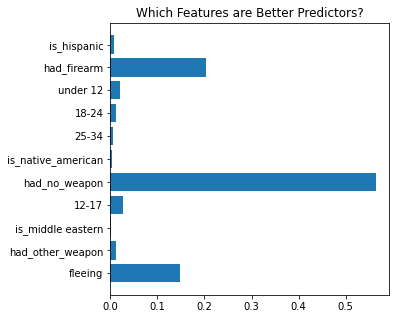

In [ ]:
# Find feature importance
print(rf.feature_importances_)

featimp = pd.DataFrame(rf.feature_importances_)
featimp['combo_feats'] = combo_feats



feature_names = combo_feats

plt.figure(figsize=(5, 5))
plt.barh(feature_names, rf.feature_importances_)
plt.title('Which Features are Better Predictors?')


In [ ]:
# append dataframe to record accuracy on final random forest
metric_df = metric_df.append({
    'Model': 'Random Forest', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(rf_train_acc, 4),
    'Validate Accuracy':round(rf_val_acc, 4),
    'Test Accuracy': round(rf_test_acc, 4)}, ignore_index=True)

In [ ]:
metric_df

,Model,Baseline,Train Accuracy,Validate Accuracy,Test Accuracy
0,Decision Tree,0.5228,0.7187,0.7187,NaN
1,Random Forest,0.5228,0.7191,0.7184,NaN
2,K-Nearest Neighbor,0.5228,0.7129,0.7044,NaN
3,Logistic Regression,0.5228,0.7178,0.7165,NaN
4,Random Forest,0.5228,0.7191,0.7184,0.7154


In [ ]:
dt.feature_importances_

array([0.0438291 , 0.01523259, 0.        , 0.00703148, 0.85229204,
       0.        , 0.        , 0.        , 0.01325378, 0.06120492,
       0.0071561 ])

In [ ]:
dt_fe_df = pd.DataFrame(dt.feature_importances_, index = X_train[combo_feats].columns,
                          columns = ['coeffs']).sort_values(by = 'coeffs', ascending = False)

In [ ]:
dt_fe_df['coeffs']= round(dt_fe_df.coeffs*100, 2)

In [ ]:
dt_fe_df

,coeffs
had_no_weapon,85.23
had_firearm,6.12
fleeing,4.38
had_other_weapon,1.52
under 12,1.33
is_hispanic,0.72
12-17,0.70
is_middle eastern,0.00
is_native_american,0.00
25-34,0.00


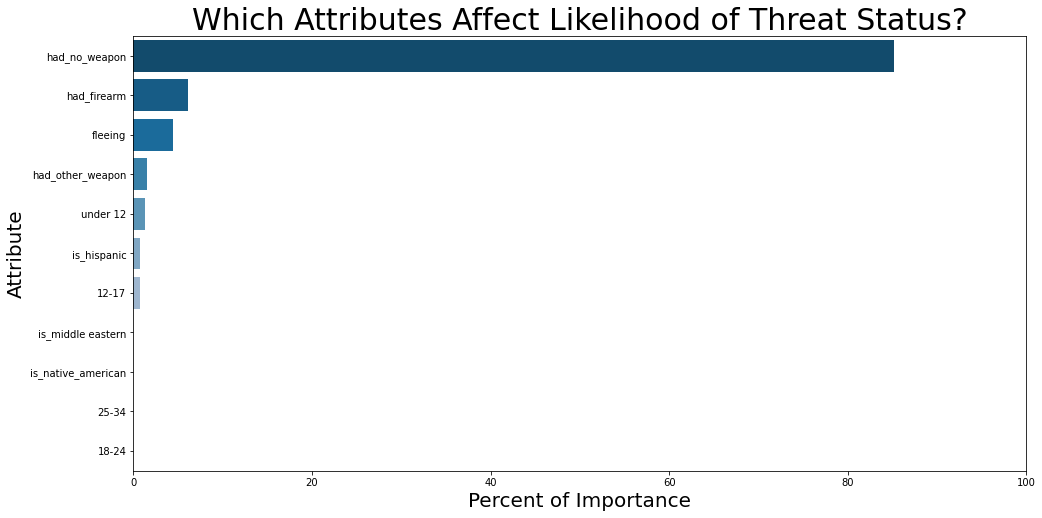

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(data=dt_fe_df, x='coeffs', y=dt_fe_df.index, palette='PuBu_r')
plt.title('Which Attributes Affect Likelihood of Threat Status?', fontsize=30)
plt.xlim([0, 100])
plt.xlabel('Percent of Importance', fontsize=20)
plt.ylabel('Attribute', fontsize=20)
plt.show()

In [ ]:
iter2_dt_acc = pd.DataFrame({

    'titles':['Actual Threat', 'Baseline Threat Accuracy', 'Decision Tree Model Threat Accuracy'],
    'pct':[round(((df.alleged_threat_lvl == "threat").mean())*100, 2), round(((train.alleged_threat_lvl == "threat").mean())*100, 2), round((dt.score(X_test[combo_feats], y_test))*100, 2)]
})

In [ ]:
iter2_rf_acc = pd.DataFrame({

    'titles':['Actual Threat', 'Baseline Threat Accuracy', 'Random Forest Model Threat Accuracy'],
    'pct':[round(((df.alleged_threat_lvl == "threat").mean())*100, 2), round(((train.alleged_threat_lvl == "threat").mean())*100, 2), round(rf_test_acc, 4)*100]
})

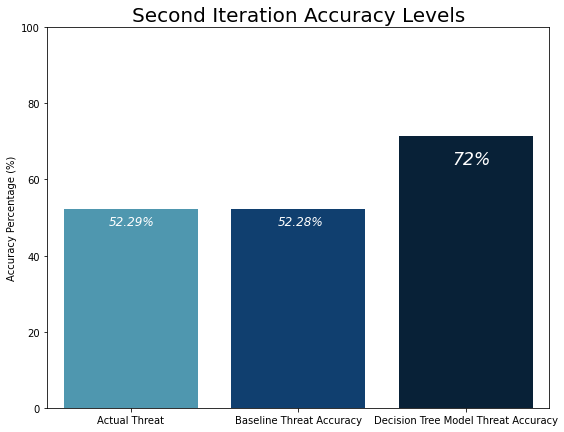

In [ ]:
f, ax = plt.subplots(figsize=(9, 7)) 

sns.barplot(data=iter2_dt_acc, x='titles', y='pct', palette='ocean_r')

ax.text(1.92, 64, '72%', style='italic', size='xx-large', color='white')
ax.text(0.88, 48, '52.28%', style='italic', size='large', color='white')
ax.text(-0.13, 48, '52.29%', style='italic', size='large', color='white')

plt.title('Second Iteration Accuracy Levels', fontsize=20)
plt.ylim([0, 100])
plt.xlabel('', fontsize=10)
plt.ylabel('Accuracy Percentage (%)', fontsize=10)
plt.show()


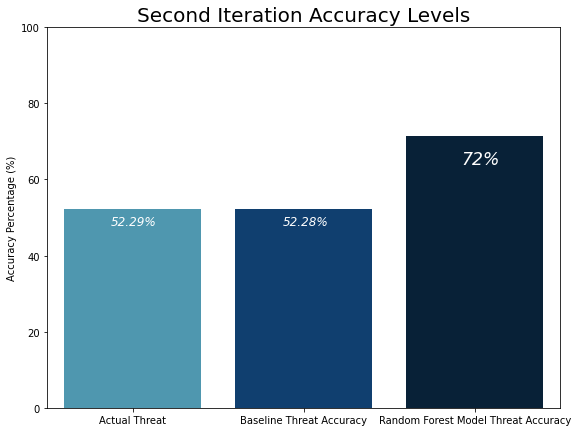

In [ ]:
f, ax = plt.subplots(figsize=(9.2, 7)) 

sns.barplot(data=iter2_rf_acc, x='titles', y='pct', palette='ocean_r')

ax.text(1.92, 64, '72%', style='italic', size='xx-large', color='white')
ax.text(0.88, 48, '52.28%', style='italic', size='large', color='white')
ax.text(-0.13, 48, '52.29%', style='italic', size='large', color='white')

plt.title('Second Iteration Accuracy Levels', fontsize=20)
plt.ylim([0, 100])
plt.xlabel('', fontsize=10)
plt.ylabel('Accuracy Percentage (%)', fontsize=10)
plt.show()

### What is ROC?

ROC curves describe the **trade-off between the true positive rate (TPR) and false positive (FPR) rate along different probability thresholds** for a classifier. True positive rate is also known as recall and sometimes Sensitivity — it’s a measure of how well you can find the needle in a haystack.

**The receiver operating characteristic (ROC) curve has become the p-value of machine learning classification** — it’s very frequently used, misused, misinterpreted, and mis-maligned.

However, ROC curves (like p-values) are useful when used right. By that, I mean they are **useful when not used as a rote score**, but when they form part of a nuanced description of a model’s ability to help solve the problem at hand (e.g. in the case of minority class identification, do they perform better than a random guess or assuming all instances are in the majority class).

### What is AUC?

Area Under the Curve gives the rate of successful classification by the model. The AUC makes it easy to compare the ROC curve of one model to another.




In [ ]:
y_train

NameError: name 'y_train' is not defined

In [ ]:
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve

plt.figure(figsize=(10,6))

y_pred = dt.predict_proba(X_train[combo_feats])[:,1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
plt.plot(fpr, tpr, color='red', lw=2, label=f'Decision Regression (area = %0.4f)' % auc(fpr, tpr))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle= '-', label = 'Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('', fontsize=17)
plt.legend(loc='lower right', fontsize=13)
plt.show()


___
# Conclusion

### Takeaways
- All models had roughly the same score for train and validate sets.
- K-Nearest neighbor model performed the worst on out-of-sample data.
- The best performing model uses a Random Forest algorithm and combined features from Select K Best and Recursive Feature Elimination lists.
- Our final Random Forest model increased by 21% from a baseline accuracy of 51% to 72% accuracy on out-of-sample data.


### Drivers
- The top drivers of predicting a victim's threat level were encounter type of incident, gender, race, armed/unarmed status, mental illness, age, geography, fleeing events, and body camera reports.
- These drivers can be used to shed light on changes to be made in law enforcement and to help law enforcement agencies spot risk factors, so they may step in before risk transforms into actual harm.


### Next Steps
- Fill in missing values manually as best as possible based on the description column in the dataset (large amount of data missing). 
- Natural language processing exploration on description of incident. 


#### Report containing summarization of notebook can be found [here](link to presentation).

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=258e71fc-cf2b-48c3-8461-70ecd9787aa1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>